# Experiment 5

## Importing Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset : [Wine Quality](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

In [26]:
datasetUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(datasetUrl, sep=';')

# Display the first five rows
print(df.head())

# Get information about data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### Plot Original Data

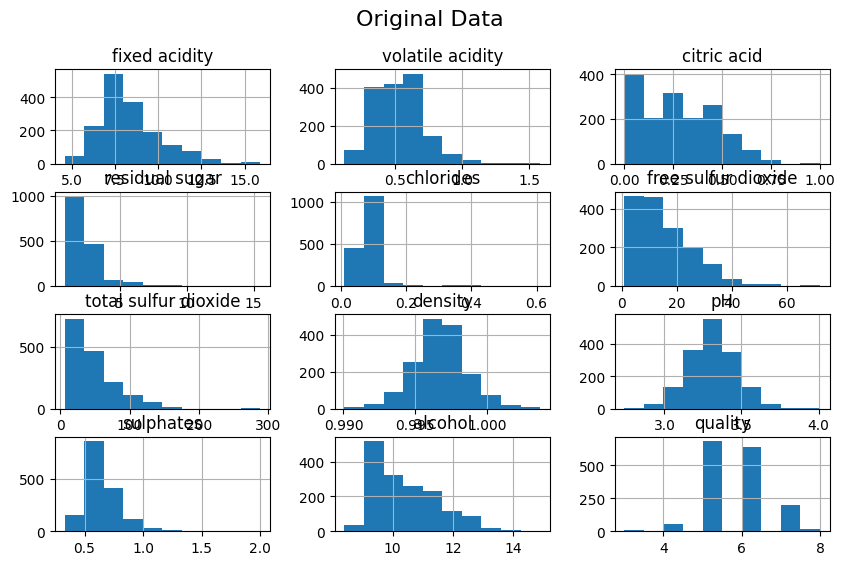

In [27]:
df.hist(bins=10, figsize=(10, 6))
plt.suptitle("Original Data", fontsize=16)
plt.show()

### Normalization Techniques

#### Min-Max Normalization

Scales the data to a fixed range, typically [0, 1].

In [28]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max normalization to all features except the target
df_min_max = df.copy()
df_min_max.iloc[:, :-1] = min_max_scaler.fit_transform(df_min_max.iloc[:, :-1])

df_min_max

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


#### Plot the Min Max Normalization

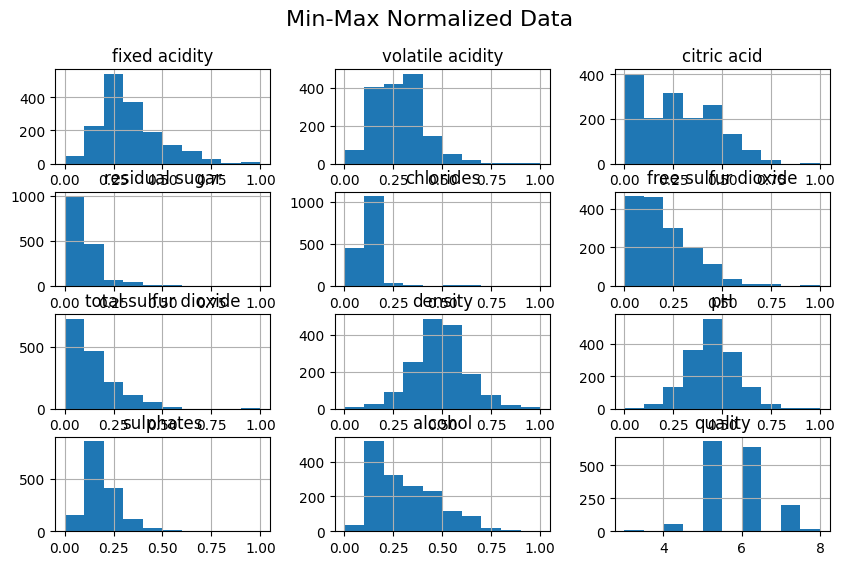

In [29]:
df_min_max.hist(bins=10, figsize=(10, 6))
plt.suptitle("Min-Max Normalized Data", fontsize=16)
plt.show()



#### Z-Score Normalization

Transforms the data to have a mean of 0 and a standard deviation of 1.

In [30]:
# Initialize the StandardScaler
z_score_scaler = StandardScaler()

# Apply Z-score normalization to all features except the target
df_z_score = df.copy()
df_z_score.iloc[:, :-1] = z_score_scaler.fit_transform(df_z_score.iloc[:, :-1])

df_z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


#### Plot Z-Score Normalization Data

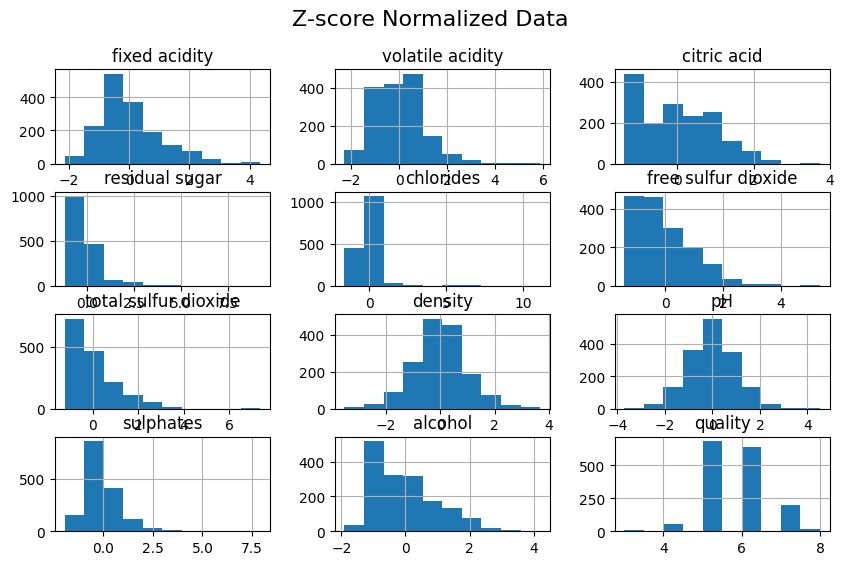

In [31]:
df_z_score.hist(bins=10, figsize=(10, 6))
plt.suptitle("Z-score Normalized Data", fontsize=16)
plt.show()

#### Decimal Scaling

Moves the decimal point of values to bring them within a certain range, typically [-1, 1].

In [32]:
# Function for Decimal Scaling
def decimal_scaling(df):
    df_decimal = df.copy()
    for column in df_decimal.columns[:-1]:
        max_abs = df_decimal[column].abs().max()
        j = np.ceil(np.log10(max_abs + 1))
        df_decimal[column] = df_decimal[column] / (10 ** j)
    return df_decimal

# Apply Decimal Scaling
df_decimal = decimal_scaling(df)

df_decimal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.074,0.0700,0.000,0.019,0.0076,0.11,0.034,0.099780,0.351,0.056,0.094,5
1,0.078,0.0880,0.000,0.026,0.0098,0.25,0.067,0.099680,0.320,0.068,0.098,5
2,0.078,0.0760,0.004,0.023,0.0092,0.15,0.054,0.099700,0.326,0.065,0.098,5
3,0.112,0.0280,0.056,0.019,0.0075,0.17,0.060,0.099800,0.316,0.058,0.098,6
4,0.074,0.0700,0.000,0.019,0.0076,0.11,0.034,0.099780,0.351,0.056,0.094,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.062,0.0600,0.008,0.020,0.0090,0.32,0.044,0.099490,0.345,0.058,0.105,5
1595,0.059,0.0550,0.010,0.022,0.0062,0.39,0.051,0.099512,0.352,0.076,0.112,6
1596,0.063,0.0510,0.013,0.023,0.0076,0.29,0.040,0.099574,0.342,0.075,0.110,6
1597,0.059,0.0645,0.012,0.020,0.0075,0.32,0.044,0.099547,0.357,0.071,0.102,5


### Discretization Techniques

#### Binning (Equal Width)

Divides the range of the data into intervals of equal size.

In [33]:
# Define the number of bins
num_bins = 10

# Apply Binning to all features except the target
df_binned = df.copy()
for column in df_binned.columns[:-1]:
    df_binned[column] = pd.cut(df_binned[column], bins=num_bins, labels=False)

df_binned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,3,0,0,1,1,0,5,6,1,1,5
1,2,5,0,1,1,3,2,4,3,2,2,5
2,2,4,0,0,1,1,1,5,4,1,2,5
3,5,1,5,0,1,2,1,5,3,1,2,6
4,2,3,0,0,1,1,0,5,6,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1,3,0,0,1,4,1,3,5,1,3,5
1595,1,2,0,0,0,5,1,3,6,2,4,6
1596,1,2,1,0,1,3,1,4,5,2,3,6
1597,1,3,1,0,1,4,1,3,6,2,2,5


### Histogram-Based Binning

Uses the histogram of the data to determine bin edges, ensuring each bin has roughly the same number of samples.

In [34]:
# Equal Frequency Binning
df_hist_binned = df.apply(lambda x: pd.qcut(x, q=5, labels=False, duplicates='drop'))

df_hist_binned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,4,0,1,1,1,2,3,4,1,0,0
1,2,4,0,3,4,4,3,2,1,3,1,0
2,2,4,0,2,3,2,3,2,1,2,1,0
3,4,0,4,1,1,3,3,3,0,1,1,1
4,1,4,0,1,1,1,2,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,3,1,1,3,4,2,0,4,1,2,0
1595,0,2,1,2,0,4,3,0,4,3,3,1
1596,0,2,1,2,1,4,2,1,3,3,3,1
1597,0,3,1,1,1,4,2,1,4,3,2,0


### Analyzing the Effects of Different Techniques

We'll analyze the impact of normalization and discretization on:

1. **Type of Attributes**
2. **Statistical Parameters (Central Tendency and Dispersion)**
3. **Aptness of Proximity Metrics**

#### Type of Attributes

- **Normalization:** Does not change the type of attributes; they remain continuous.
- **Discretization:** Converts continuous attributes into categorical (ordinal) attributes.

#### Statistical Parameters

In [35]:
# Original Data Statistics
print("Original Data Statistics:")
print(df.describe())

# Min-Max Normalized Data Statistics
print("\nMin-Max Normalized Data Statistics:")
print(df_min_max.describe())

# Z-Score Normalized Data Statistics
print("\nZ-Score Normalized Data Statistics:")
print(df_z_score.describe())

# Decimal Scaled Data Statistics
print("\nDecimal Scaled Data Statistics:")
print(df_decimal.describe())

Original Data Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000    

### **Aptness of Proximity Metrics**

- **Without Normalization:**
  - Features with larger ranges dominate distance calculations, potentially biasing models.
  
- **With Normalization:**
  - Ensures each feature contributes equally, leading to more balanced and meaningful distance metrics.
  
**Implications:**

- **K-Nearest Neighbors (KNN):** Performance significantly improves with normalization.
- **Clustering Algorithms (e.g., K-Means):** Better cluster formation due to balanced feature contributions.

### **Discretization Effects**

- **Binning (Equal Width):**
  - Simple to implement but may not account for data distribution.
  
- **Histogram-Based Binning:**
  - Accounts for data distribution, providing more balanced bins.

**Implications:**

- **Decision Trees:** Discretization can lead to simpler tree structures.
- **Reduced Information:** May lose some information due to grouping, potentially impacting model performance.

---

## **Conclusion**

Normalization and discretization are crucial preprocessing steps in machine learning workflows. They address issues related to varying feature scales and continuous data representation, respectively. Here's a summary of the key takeaways from the experiment:

1. **Normalization:**
   - Essential for algorithms sensitive to feature scales.
   - Techniques like Min-Max and Z-score normalization adjust data scales effectively.
   - Z-score normalization is particularly useful for standardizing data distributions.

2. **Discretization:**
   - Transforms continuous data into categorical bins, suitable for certain algorithms.
   - Binning methods can simplify data but may lead to information loss.
   - Histogram-based binning provides a more balanced approach by considering data distribution.

3. **Impact on Proximity Metrics:**
   - Normalization ensures equitable feature contribution in distance calculations.
   - Enhances the performance of distance-based algorithms like KNN and clustering.

4. **Statistical Parameters:**
   - Normalization alters central tendency and dispersion, making data suitable for various algorithms.
   - Discretization affects the representation of data, converting continuous attributes into categorical ones.

**Final Recommendation:**

- **Before Applying Normalization:**
  - Assess the algorithms to be used and their sensitivity to feature scales.
  - Choose normalization techniques that align with the model requirements.

- **Before Applying Discretization:**
  - Determine if the model benefits from categorical representation.
  - Select appropriate binning methods based on data distribution and model needs.

In summary, thoughtful application of normalization and discretization enhances model performance, ensures balanced feature contributions, and aligns data representation with algorithmic requirements.